# Monthly data generation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df_metricas_mensuales= pd.read_parquet('data/metricas_mensuales.parquet')

In [3]:
df_metricas_3m= pd.read_parquet('data/metricas_3m.parquet')

In [4]:
df_metricas_mensuales

,station,mes,r2,r2_ajustado,rmse,mae,std_obs,std_pred,kge,spearman,bias,source
0,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,1,-0.432291,-0.611327,104.202734,85.149000,87.068998,61.649527,0.082316,-0.066667,-38.045000,agera5
1,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2,-0.219753,-0.372223,67.194785,59.931000,60.841450,42.888447,0.222341,0.163636,-26.109000,agera5
2,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,3,0.024200,-0.084222,113.514574,96.960000,114.913563,76.125412,0.267899,0.527273,4.892728,agera5
3,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,4,-0.203629,-0.337365,74.644062,48.032727,68.037605,65.202683,0.428948,0.518182,34.945454,agera5
4,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,5,-0.091494,-0.200644,584.099227,249.586666,559.082449,54.429757,-0.616465,0.020979,-91.495000,agera5
...,...,...,...,...,...,...,...,...,...,...,...,...
907,FEDEARROZ_FONSECA_GRANJA_ITA,8,0.386144,0.263373,39.844381,32.849650,50.855017,28.618288,0.425404,0.714286,-3.849754,chirps
908,FEDEARROZ_FONSECA_GRANJA_ITA,9,-1.042684,-1.334496,71.812709,48.785188,50.245911,41.581126,0.059785,0.000000,40.306839,chirps
909,FEDEARROZ_FONSECA_GRANJA_ITA,10,-2.386329,-2.870091,70.071233,56.439062,38.078090,53.886941,-0.053536,0.000000,27.652428,chirps
910,FEDEARROZ_FONSECA_GRANJA_ITA,11,0.144924,0.022770,109.159472,94.198553,118.048089,61.579743,0.179913,0.866667,44.837188,chirps


# Boxplots

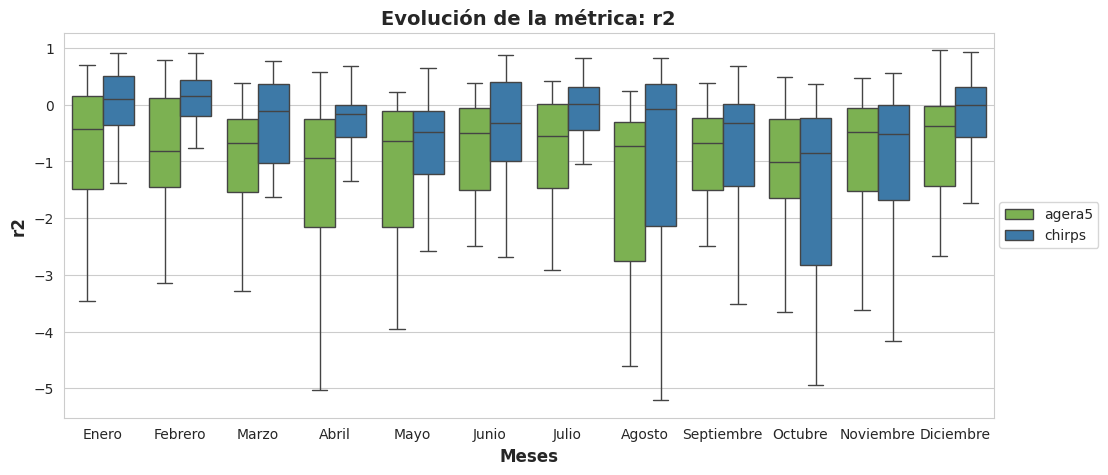

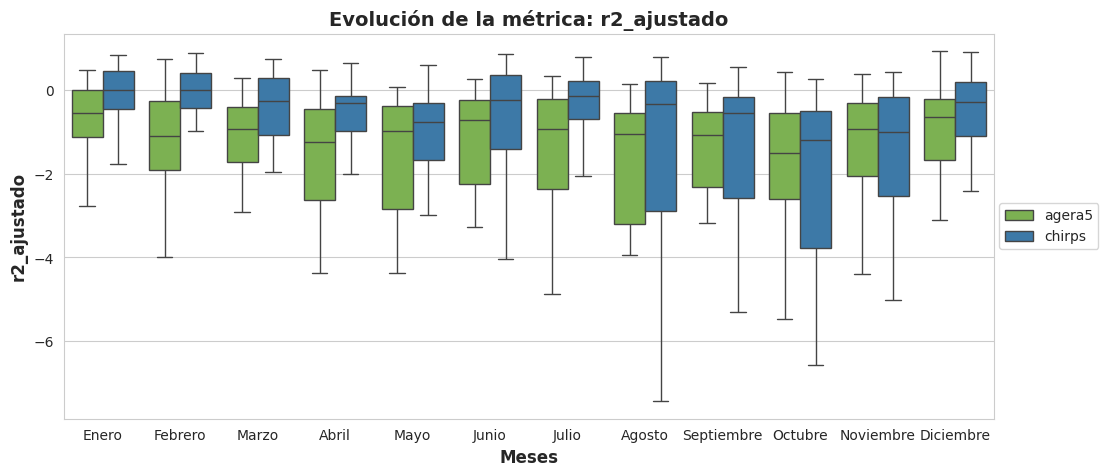

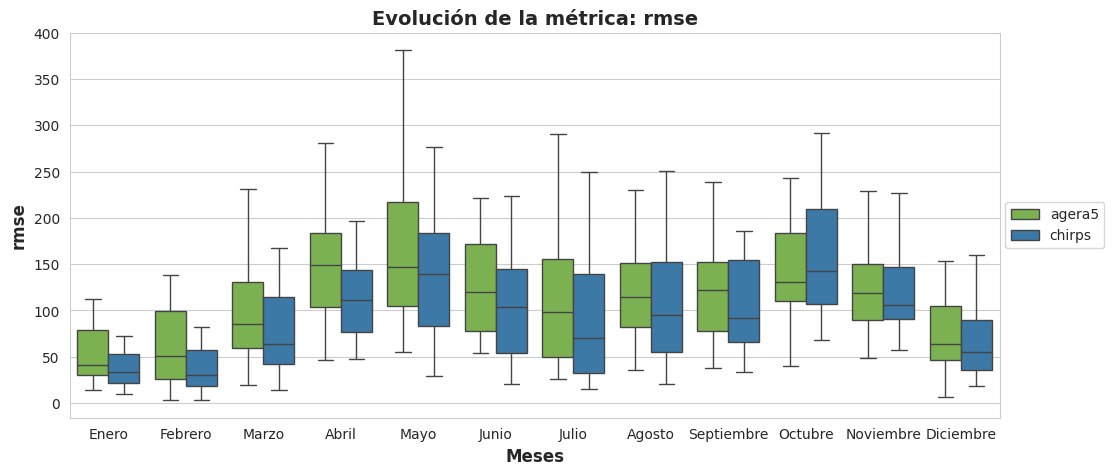

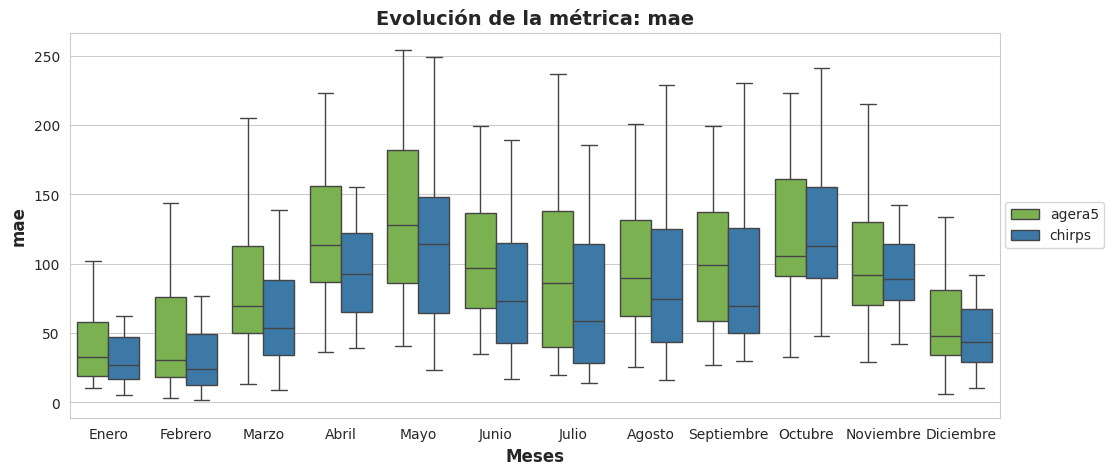

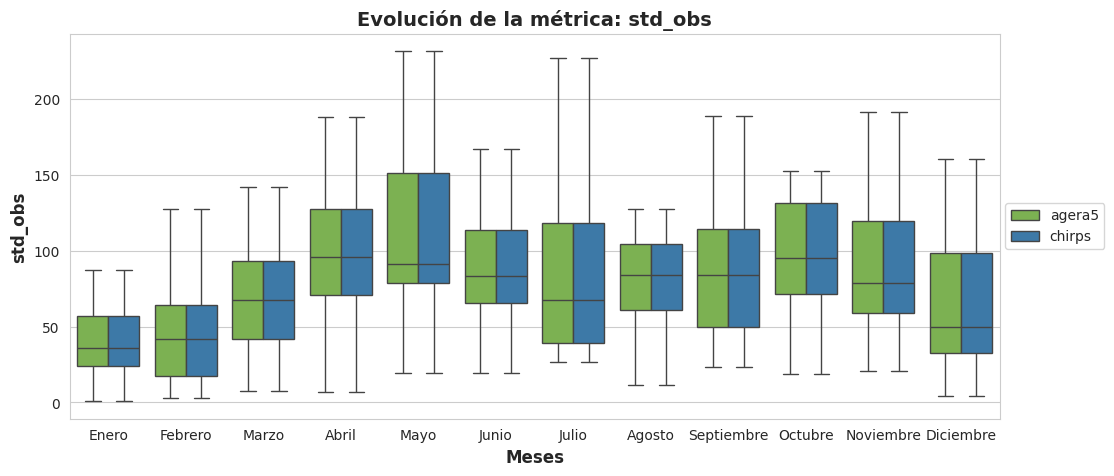

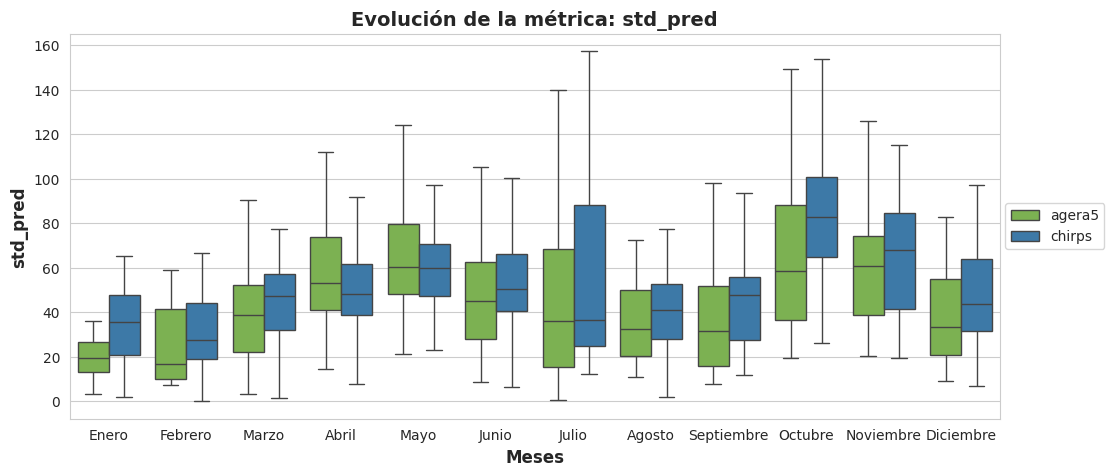

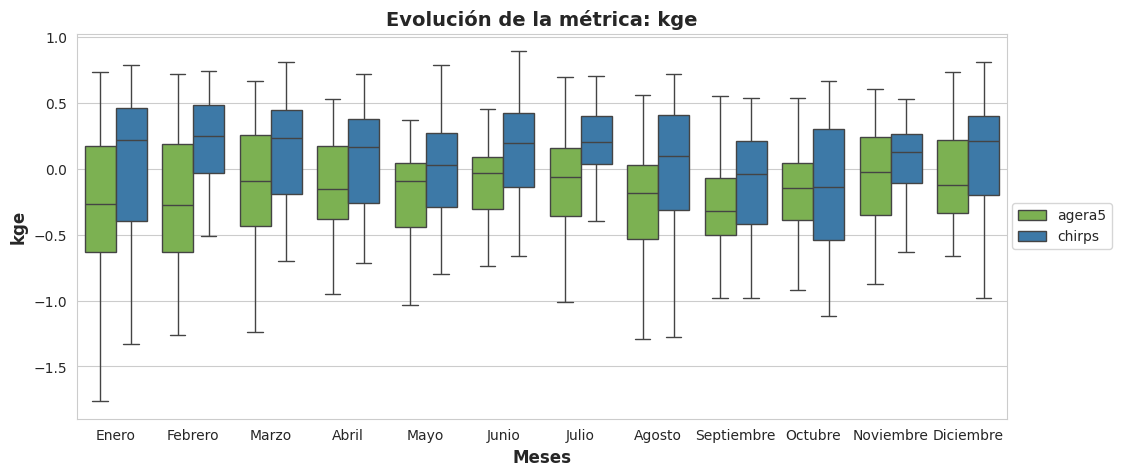

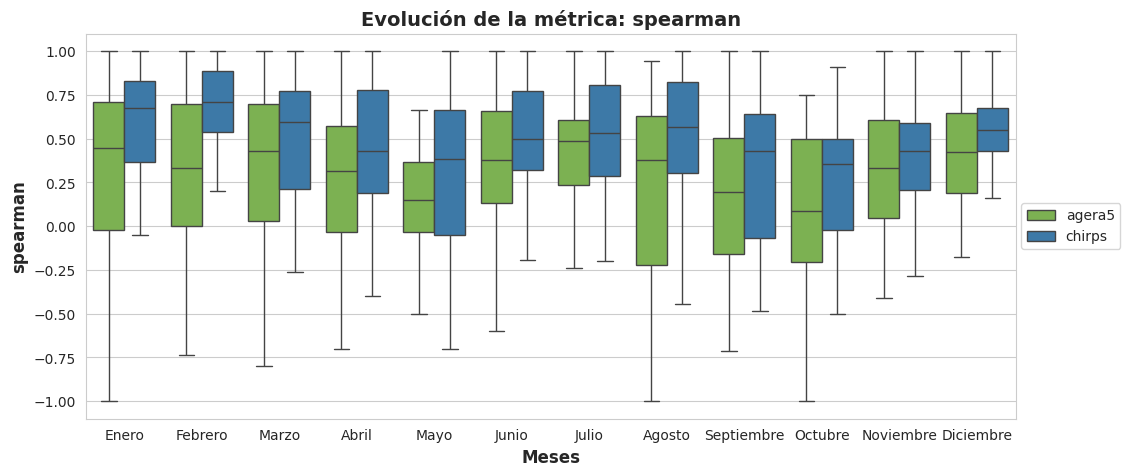

In [5]:
# Diccionario para mapear números de meses a nombres
meses_dict = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
    7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}

# Reemplazar los números de mes por los nombres en el dataframe reestructurado
df_metricas_mensuales['mes'] = df_metricas_mensuales['mes'].replace(meses_dict)

# Función para generar boxplots con los nombres de meses
def boxplots_months(df, tipo_periodo="mes"):
    for metric in df.columns.to_list()[2:-2]:  # Iterar por las métricas (excluyendo columnas como 'station' y 'mes/trimestre')
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, figsize=(12, 5))

        # Definir paleta de colores
        palette = {"chirps": "#2B7BB9", "agera5": "#7AC142"}

        # Crear el boxplot para la métrica actual
        fig = sns.boxplot(
            data=df,
            x=tipo_periodo,  # Columna 'mes' para gráficos mensuales, 'trimestre' para trimestrales
            y=f'{metric}',  # Métrica que se está evaluando
            hue='source',  # Columnas que indican la fuente
            showfliers=False,
            palette=palette
        )
        
        # Ajustar etiquetas y título
        fig.set_xlabel('Meses' if tipo_periodo == "mes" else 'Trimestres', fontsize=12, fontweight='bold')
        fig.set_ylabel(f'{metric}', fontsize=12, fontweight='bold')
        fig.set_title('Evolución de la métrica: ' + f'{metric}', fontsize=14, fontweight='bold')

        # Ordenar la leyenda
        handles, labels = plt.gca().get_legend_handles_labels()
        order = ["agera5", "chirps"]  # Orden de las fuentes
        handles = [handles[labels.index(label)] for label in order]
        labels = order
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.12, 0.5))

        # Mostrar el gráfico
        plt.show()

# Usar la función para gráficos mensuales con los nombres de los meses
boxplots_months(df_metricas_mensuales, tipo_periodo="mes")


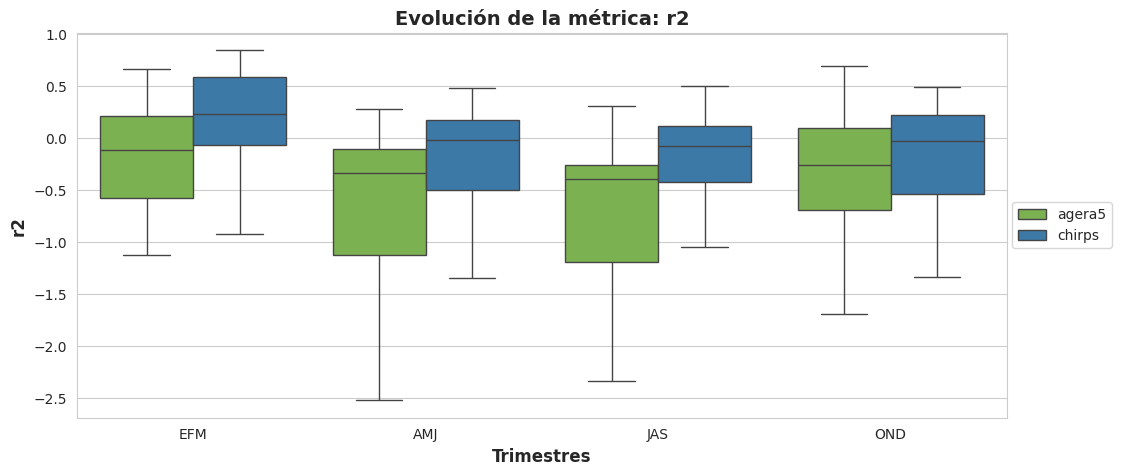

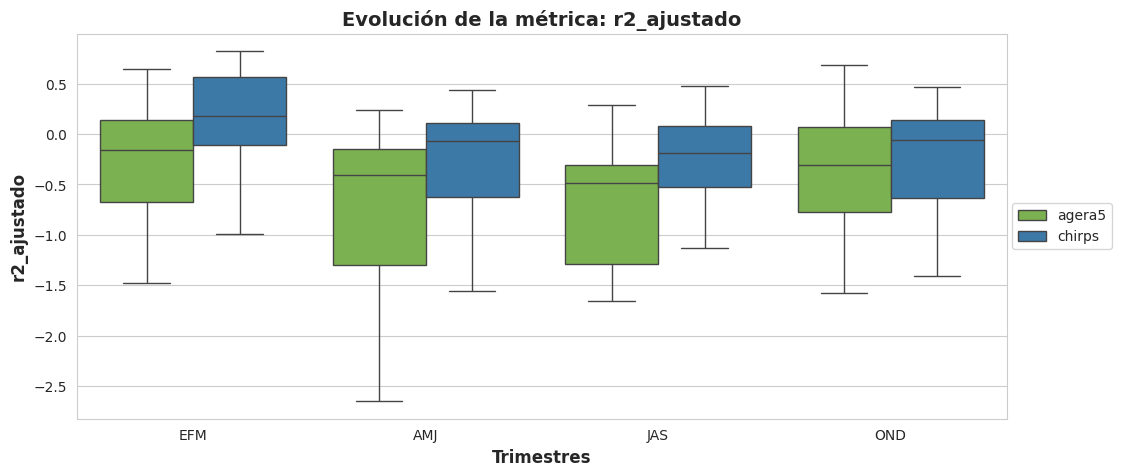

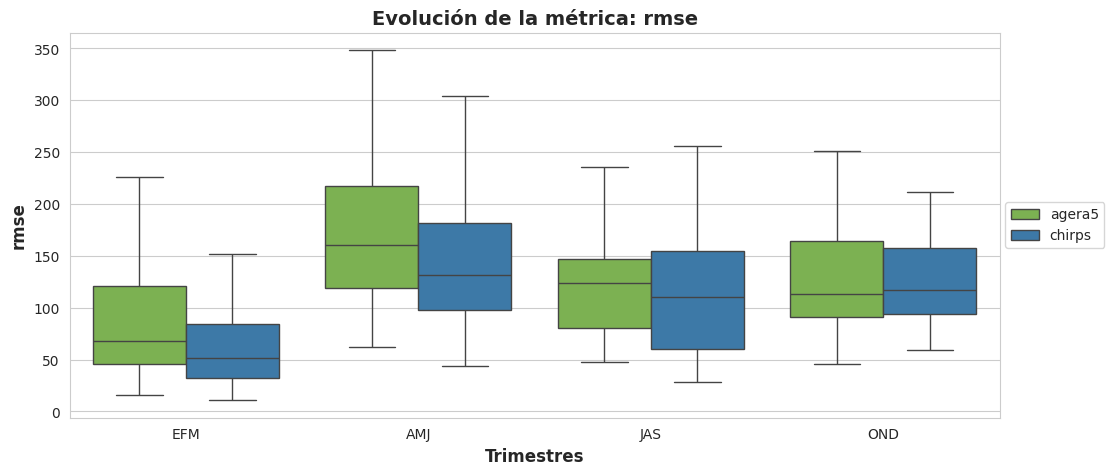

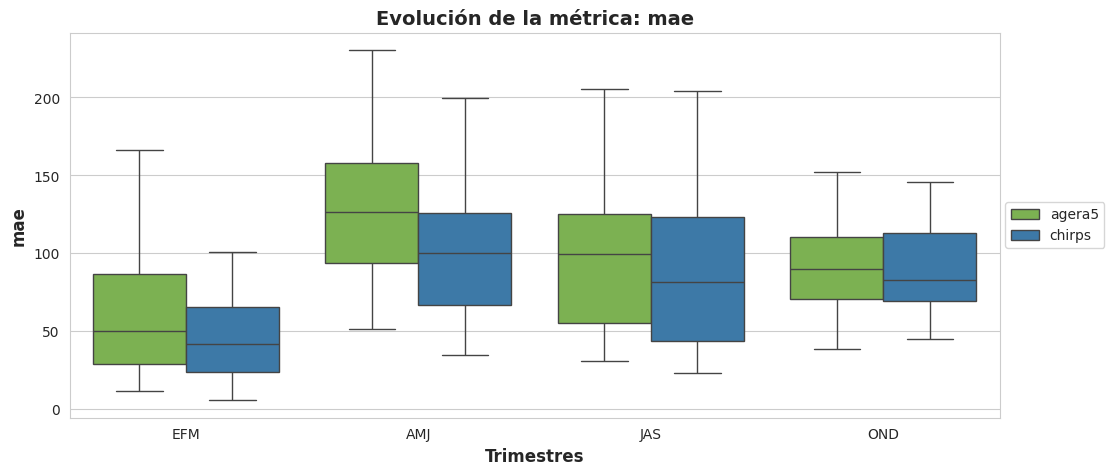

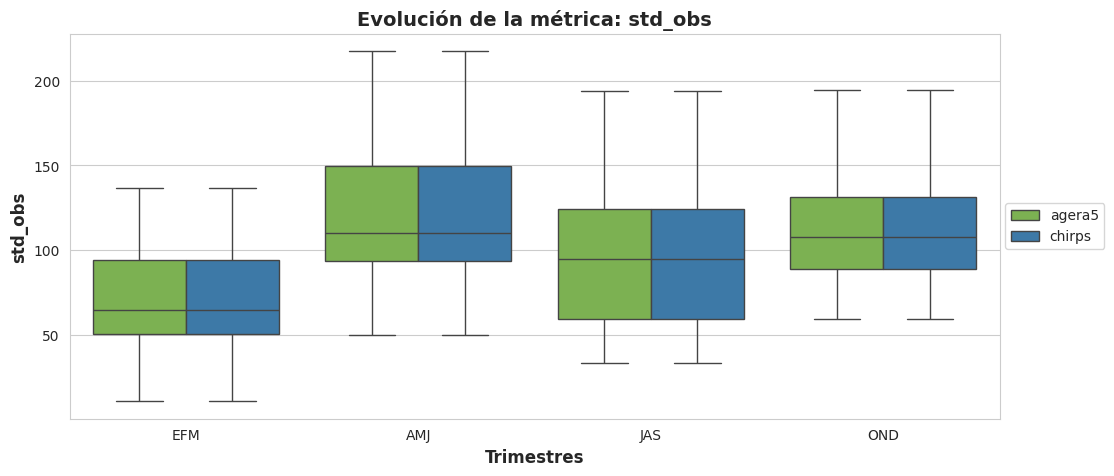

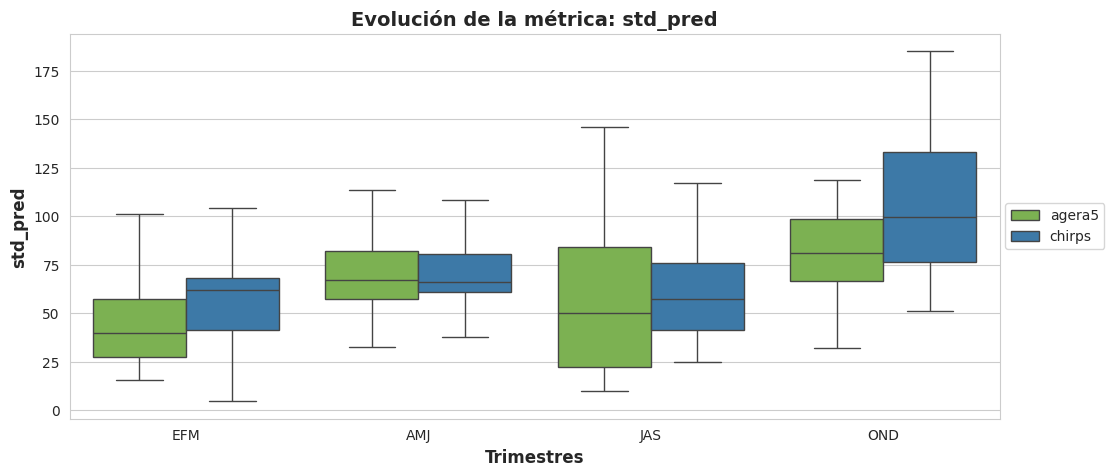

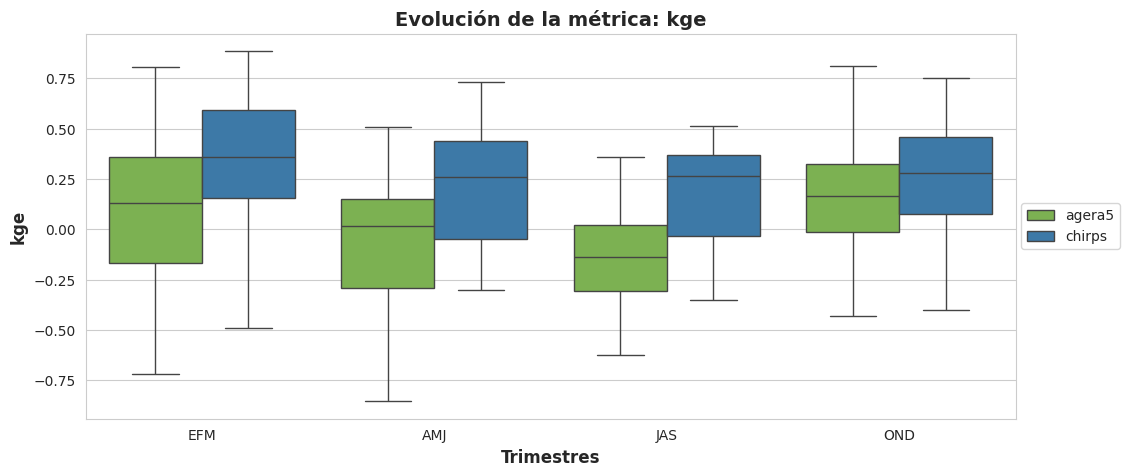

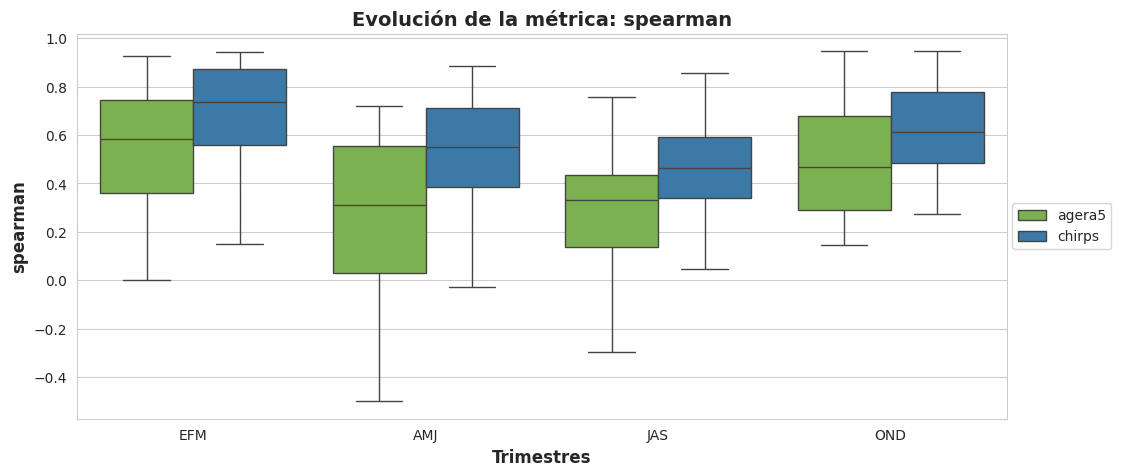

In [6]:
# Función para generar boxplots con los trimestres
def boxplots_trimestres(df, tipo_periodo="trimestre"):
    for metric in df.columns.to_list()[2:-2]:  # Iterar por las métricas (excluyendo columnas como 'station' y 'trimestre/source')
        sns.set_style('whitegrid')
        fig, ax = plt.subplots(1, figsize=(12, 5))

        # Definir paleta de colores (verde y azul del mapa)
        palette = {"chirps": "#2B7BB9", "agera5": "#7AC142"}

        # Crear el boxplot para la métrica actual
        fig = sns.boxplot(
            data=df,
            x=tipo_periodo,  # Columna 'trimestre'
            y=f'{metric}',  # Métrica que se está evaluando
            hue='source',  # Columnas que indican la fuente
            showfliers=False,
            palette=palette
        )
        
        # Ajustar etiquetas y título
        fig.set_xlabel('Trimestres', fontsize=12, fontweight='bold')
        fig.set_ylabel(f'{metric}', fontsize=12, fontweight='bold')
        fig.set_title('Evolución de la métrica: ' + f'{metric}', fontsize=14, fontweight='bold')

        # Ordenar la leyenda
        handles, labels = plt.gca().get_legend_handles_labels()
        order = ["agera5", "chirps"]  # Orden de las fuentes
        handles = [handles[labels.index(label)] for label in order]
        labels = order
        fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.12, 0.5))

        # Mostrar el gráfico
        plt.show()

# Usar la función para gráficos trimestrales
boxplots_trimestres(df_metricas_3m, tipo_periodo="trimestre")


In [7]:
arroz_all = pd.read_parquet('data/prec_monthly_obs_sat.parquet')
arroz_all

,latitud,longitud,dpto,mun,station,month_year,fuente,prec_month
0,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,agera5-precipitation,228.520000
1,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,chirps-precipitation,436.494230
2,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,ideam,513.200000
3,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-12,agera5-precipitation,164.050001
4,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-12,chirps-precipitation,242.482750
...,...,...,...,...,...,...,...,...
11189,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-11,chirps-precipitation,190.283857
11190,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-11,ideam,412.410000
11191,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-12,agera5-precipitation,27.180000
11192,10.87405,-72.85299,GUAJIRA,FONSECA,FEDEARROZ_FONSECA_GRANJA_ITA,2023-12,chirps-precipitation,15.484619


In [8]:
test = arroz_all[arroz_all.station=='FEDEARROZ_CAMPOALEGRE_ALTAGRACIA']
test

,latitud,longitud,dpto,mun,station,month_year,fuente,prec_month
0,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,agera5-precipitation,228.520000
1,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,chirps-precipitation,436.494230
2,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-11,ideam,513.200000
3,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-12,agera5-precipitation,164.050001
4,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2011-12,chirps-precipitation,242.482750
...,...,...,...,...,...,...,...,...
399,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2024-04,ideam,286.450000
400,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2024-05,ideam,191.170000
401,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2024-06,ideam,93.950000
402,2.69814,-75.29815,HUILA,CAMPOALEGRE,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,2024-07,ideam,28.170000


In [9]:
testy = test[test.fuente=='ideam'][['month_year','prec_month']].merge(test[test.fuente=='chirps-precipitation'][['month_year','prec_month']], how='inner', on='month_year')
testy['month_year'] = testy['month_year'].apply(lambda x: x.to_timestamp())
testy['mes'] = pd.to_datetime(testy['month_year'], format='%Y-%m').dt.month
testy

,month_year,prec_month_x,prec_month_y,mes
0,2011-11-01,513.20,436.494230,11
1,2011-12-01,246.60,242.482750,12
2,2012-01-01,276.40,182.780787,1
3,2012-02-01,30.20,81.931501,2
4,2012-03-01,110.20,140.223938,3
...,...,...,...,...
127,2023-08-01,38.60,49.751332,8
128,2023-09-01,3.80,32.821951,9
129,2023-10-01,154.14,152.762232,10
130,2023-11-01,246.34,182.929051,11


In [10]:
import pandas as pd
import numpy as np
import skill_metrics as sm
from sys import version_info
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [11]:
def taylor_diagram( df:pd.DataFrame,
                   orginal_value:str,
                   predicted_value:str):


    plt.close('all')


    taylor_stats1 = sm.taylor_statistics(df[orginal_value],df[predicted_value])

    # Store statistics in arrays
    sdev = np.array([taylor_stats1['sdev'][0], taylor_stats1['sdev'][1]])
    crmsd = np.array([taylor_stats1['crmsd'][0], taylor_stats1['crmsd'][1]])
    ccoef = np.array([taylor_stats1['ccoef'][0], taylor_stats1['ccoef'][1]])


    sm.taylor_diagram(sdev,crmsd,ccoef)
    #plt.show()

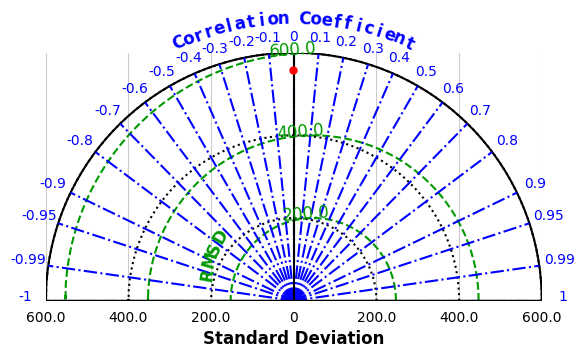

In [12]:
taylor_diagram(df=testy[testy.mes==5],
               orginal_value='prec_month_x',
               predicted_value= 'prec_month_y')


In [13]:

# Modifing default values of matplotlib
rcParams["figure.figsize"] = [10, 10]
rcParams['lines.linewidth'] = 0.4 
rcParams.update({'font.size': 10})  


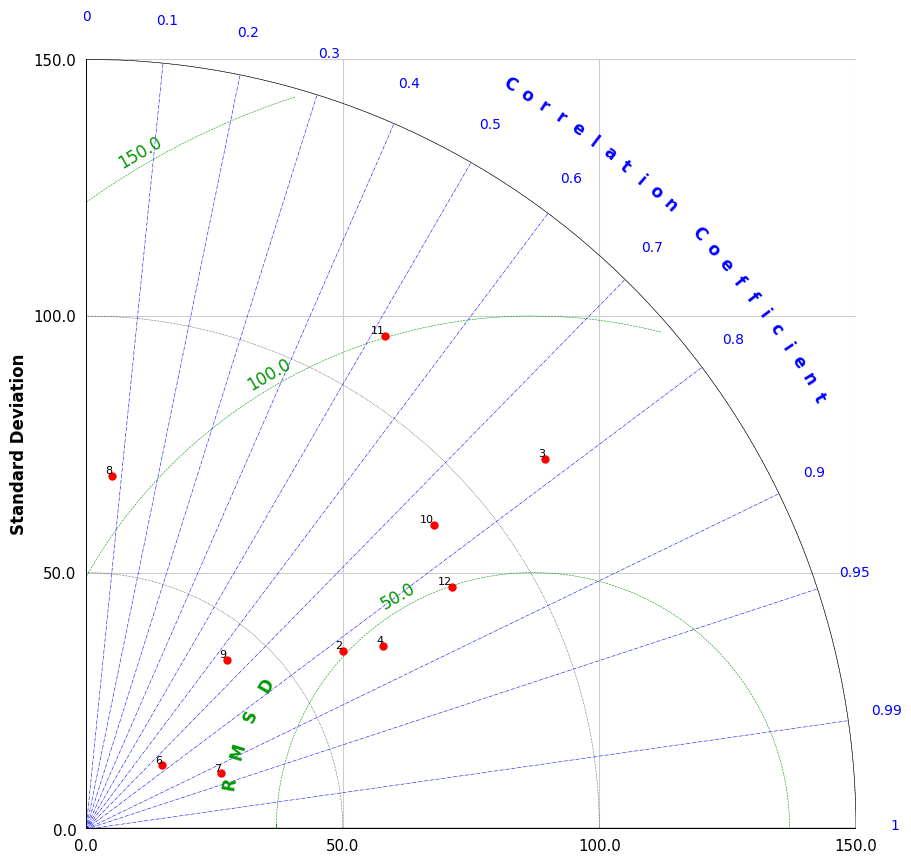

In [14]:
import pandas as pd
import numpy as np
import skill_metrics as sm
import matplotlib.pyplot as plt

def taylor_diagram(df: pd.DataFrame, original_value: str, predicted_value: str, month_col: str):
    plt.close('all')

    # Almacenar las estadísticas de Taylor para todos los meses
    sdev = []
    crmsd = []
    ccoef = []
    marker_labels = []

    # Iterar sobre los meses únicos y calcular las estadísticas de Taylor para cada uno
    for mes in [1,2,3,4,6,7,8,9,10,11,12]:
        df_mes = df[df[month_col] == mes]
        taylor_stats = sm.taylor_statistics(df_mes[original_value], df_mes[predicted_value])

        # Agregar las estadísticas a las listas
        sdev.append(taylor_stats['sdev'][1])  # Sdev para el valor predicho
        crmsd.append(taylor_stats['crmsd'][1])  # Crmsd para el valor predicho
        ccoef.append(taylor_stats['ccoef'][1])  # Ccoef para el valor predicho
        marker_labels.append(str(mes))  # Convertimos el mes en string para la etiqueta

    # Convertir las listas en arrays para la gráfica
    sdev = np.array(sdev)
    crmsd = np.array(crmsd)
    ccoef = np.array(ccoef)

    # Crear el diagrama de Taylor con los puntos de todos los meses
    sm.taylor_diagram(sdev, crmsd, ccoef, markerLabel=marker_labels, markerColor='r')

    plt.show()

# Usar la función con tu dataframe testy
taylor_diagram(testy, 'prec_month_x', 'prec_month_y', 'mes')


/var/tmp/ipykernel_48515/2473219821.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Reds', 12)


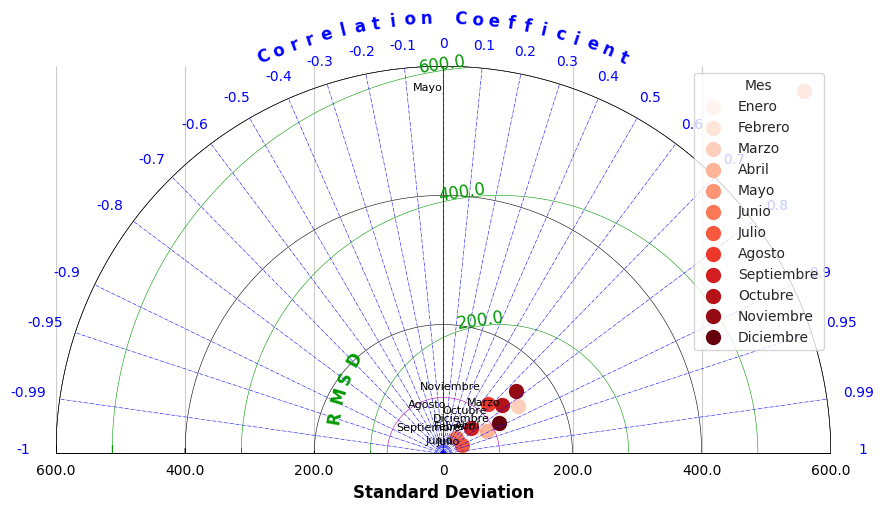

In [15]:
import pandas as pd
import numpy as np
import skill_metrics as sm
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Para la escala de colores

# Nombres de los meses
months_dict = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
               7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

def taylor_diagram(df: pd.DataFrame, original_value: str, predicted_value: str, month_col: str):
    plt.close('all')

    # Almacenar las estadísticas de Taylor para todos los meses
    sdev = []
    crmsd = []
    ccoef = []
    marker_labels = []

    # Obtener una escala de colores rojos
    cmap = cm.get_cmap('Reds', 12)

    # Iterar sobre los meses únicos y calcular las estadísticas de Taylor para cada uno
    for mes in sorted(df[month_col].unique()):
        df_mes = df[df[month_col] == mes]
        taylor_stats = sm.taylor_statistics(df_mes[original_value], df_mes[predicted_value])

        # Agregar las estadísticas a las listas
        sdev.append(taylor_stats['sdev'][1])  # Sdev para el valor predicho
        crmsd.append(taylor_stats['crmsd'][1])  # Crmsd para el valor predicho
        ccoef.append(taylor_stats['ccoef'][1])  # Ccoef para el valor predicho
        marker_labels.append(months_dict.get(mes, str(mes)))  # Etiqueta de mes en formato "Enero", "Febrero", etc.

    # Convertir las listas en arrays para la gráfica
    sdev = np.array(sdev)
    crmsd = np.array(crmsd)
    ccoef = np.array(ccoef)

    # Crear la figura más grande y con líneas más suaves
    plt.figure(figsize=(10, 8))

    # Crear el diagrama de Taylor sin colores de marcador
    sm.taylor_diagram(sdev, crmsd, ccoef, markerLabel=marker_labels, markerSize=0.2, 
                      styleOBS='-', styleRMS='-', styleSTD='-')  # Líneas más suaves
    
    # Añadir los puntos de colores correspondientes a cada mes
    for i, label in enumerate(marker_labels):
        plt.scatter(sdev[i], crmsd[i], color=cmap(i / 11), label=label, s=100)  # Usamos cmap para dar color a cada mes

    # Mostrar leyenda y gráfico
    plt.legend(title="Mes")
    plt.show()

# Usar la función con tu dataframe testy
taylor_diagram(testy, 'prec_month_x', 'prec_month_y', 'mes')
